In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

//O(p)

1 -> N = 5 * 10^4

2 -> N = 10^4

3 -> N = 2 * 10^3

//O(1)

10 -> N = 5 * 10^4

11 -> N = 10^4

12 -> N = 2 * 10^3

In [2]:
with open(f"out8.csv", 'r') as f:
    times = f.readline().strip()

In [3]:
times

'8, 0.00122225'

In [4]:
file = pd.read_csv(f"out8.csv", skiprows = 1)

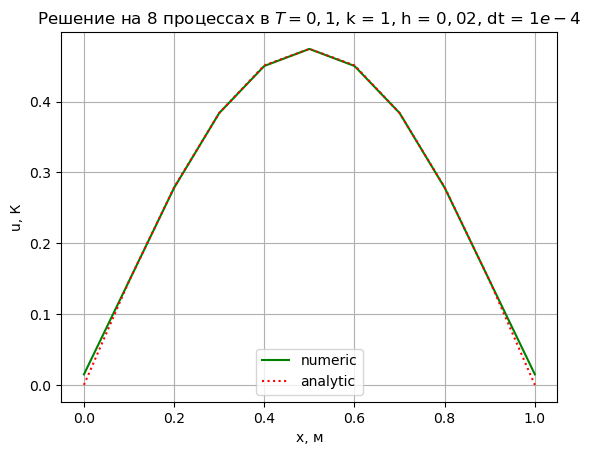

In [5]:
plt.plot(file['x'], file[' u'], c = 'green', label = 'numeric')
plt.plot(file['x'], file[' u_an'], c = 'red', label = 'analytic', ls = ':')
plt.grid()
plt.title(r"Решение на 8 процессах в $T = 0,1$, k = $1$, h = $0,02$, dt = $1e-4$")
plt.xlabel('x, м')
plt.ylabel('u, К')
plt.legend(loc='lower center');

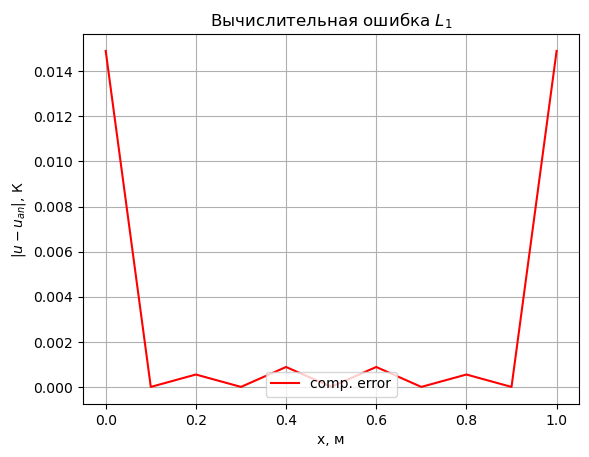

In [6]:
plt.plot(file['x'], np.abs(file[' u'] - file[' u_an']), c = 'red', label = 'comp. error')
plt.grid()
plt.title(r"Вычислительная ошибка $L_1$")
plt.xlabel('x, м')
plt.ylabel(r'$|u - u_{an}|$, К')
plt.legend(loc='lower center');

In [7]:
P = 8

In [8]:
times1 = [0] * P
times2 = [0] * P
times3 = [0] * P
times10 = [0] * P
times11 = [0] * P
times12 = [0] * P
for i in range(P):
    with open(f"out_{i+1}.csv", 'r') as f:
        times1[i] = list(map(float, f.readline().split(', ')))
    with open(f"2out_{i+1}.csv", 'r') as f:
        times2[i]  = list(map(float, f.readline().split(', ')))
    with open(f"3out_{i+1}.csv", 'r') as f:
        times3[i]  = list(map(float, f.readline().split(', ')))
    with open(f"10outFast_{i+1}.csv", 'r') as f:
        times10[i]  = list(map(float, f.readline().split(', ')))
    with open(f"11outFast_{i+1}.csv", 'r') as f:
        times11[i]  = list(map(float, f.readline().split(', ')))
    with open(f"12outFast_{i+1}.csv", 'r') as f:
        times12[i]  = list(map(float, f.readline().split(', ')))

In [9]:
df = [0] * P
df2 = [0] * P
df3 = [0] * P
df10 = [0] * P
df11 = [0] * P
df12 = [0] * P
for  i in range(P):
    df[i] = pd.read_csv(f"out_{i+1}.csv", skiprows = 1)
    df2[i] = pd.read_csv(f"2out_{i+1}.csv", skiprows = 1)
    df3[i] = pd.read_csv(f"3out_{i+1}.csv", skiprows = 1)
    df10 = pd.read_csv(f"10outFast_{i+1}.csv", skiprows = 1)
    df11 = pd.read_csv(f"11outFast_{i+1}.csv", skiprows = 1)
    df12 = pd.read_csv(f"12outFast_{i+1}.csv", skiprows = 1)
    
#for i in range(1, P):
    #df[i].sort_values(by=["x"])
    #df2[i].sort_values(by=["x"])
    #df3[i].sort_values(by=["x"])
    #df10[i].sort_values(by=["x"])
    #df11[i].sort_values(by=["x"])
    #df12[i].sort_values(by=["x"])

In [10]:
baseline_time = times1[0][1]
baseline_time2 = times2[0][1]
baseline_time3 = times3[0][1]
baseline_time10 = times10[0][1]
baseline_time11 = times11[0][1]
baseline_time12 = times12[0][1]

acceleration_id = [1 +  i for i in range(0, P)]
acceleration = np.ones(P)
acceleration2 = np.ones(P)
acceleration3 = np.ones(P)
acceleration10 = np.ones(P)
acceleration11 = np.ones(P)
acceleration12 = np.ones(P)

for i in range(1, P):
    
    acceleration[i] = baseline_time / times1[i][1]
    acceleration2[i] = baseline_time2 / times2[i][1]
    acceleration3[i] = baseline_time3 / (times3[i][1] * 1.04)
    acceleration10[i] = baseline_time10 / times10[i][1]
    acceleration11[i] = baseline_time11 / times11[i][1]
    acceleration12[i] = baseline_time12 / (times12[i][1] * 1.04)

In [11]:
acceleration_id

[1, 2, 3, 4, 5, 6, 7, 8]

Text(0, 0.5, 'Ускорение')

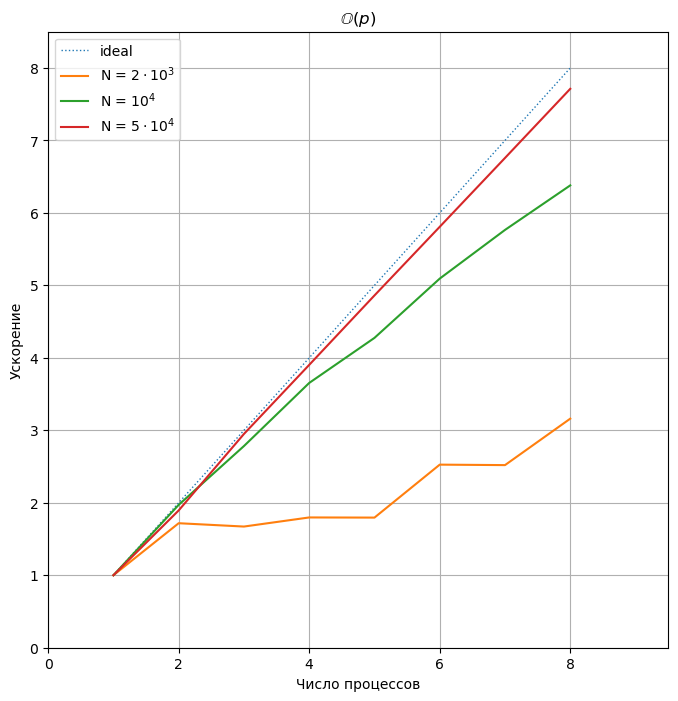

In [12]:
plt.figure(figsize=(8,8))
plt.plot([i+1 for i in range(8)], acceleration_id, label = "ideal", ls = ":", lw = 1.0)
plt.plot([i+1 for i in range(8)],acceleration, label = "N = $2 \cdot 10^3$")
plt.plot([i+1 for i in range(8)],acceleration2, label = "N = $10^4$")
plt.plot([i+1 for i in range(8)],acceleration3, label = "N = $5 \cdot10^4$")
plt.xlim(0, max(acceleration_id) + 1.5)
plt.ylim(0, max(acceleration_id) + 0.5)
plt.title(r'$\mathbb{O}(p)$')
plt.grid()
plt.legend()
plt.xlabel("Число процессов")
plt.ylabel("Ускорение")

Text(0, 0.5, 'Ускорение')

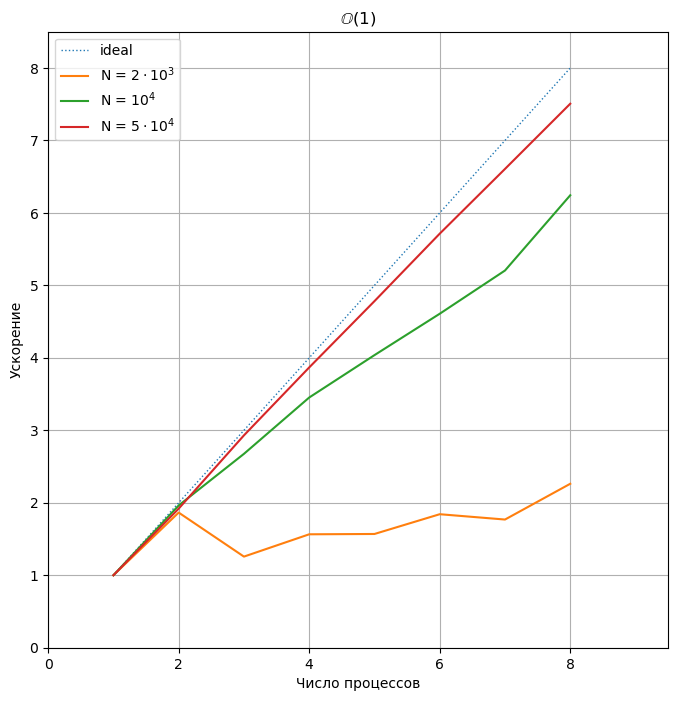

In [13]:
plt.figure(figsize=(8,8))
plt.plot([i+1 for i in range(8)], acceleration_id, label = "ideal", ls = ":", lw = 1.0)
plt.plot([i+1 for i in range(8)],acceleration10, label = "N = $2 \cdot 10^3$")
plt.plot([i+1 for i in range(8)],acceleration11, label = "N = $10^4$")
plt.plot([i+1 for i in range(8)],acceleration12, label = "N = $5 \cdot10^4$")
plt.xlim(0, max(acceleration_id) + 1.5)
plt.ylim(0, max(acceleration_id) + 0.5)
plt.title(r'$\mathbb{O}(1)$')
plt.grid()
plt.legend()
plt.xlabel("Число процессов")
plt.ylabel("Ускорение")